In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("cluster_4y.csv")

In [3]:
data.head()

,Unnamed: 0,BBL,EUI_16,Score_16,EUI_15,Score_15,EUI_14,Score_14,EUI_13,Score_13
0,0,1.014270e+09,44.5,80.0,195.7,Not Available,172.7,Not Available,180.3,NaN
1,1,1.015180e+09,90.8,10.0,159.7,Not Available,103.4,Not Available,94.8,NaN
2,2,1.000048e+09,133.8,71.0,358.8,61,229.5,92,287.9,75
3,3,1.000058e+09,132.5,71.0,223.5,77,238,73,261.5,70
4,4,1.000088e+09,139.2,1.0,165,1,205.3,Not Available,163.2,NaN


In [4]:
data_day = data[['EUI_16', 'EUI_15', 'EUI_14', 'EUI_13', 'BBL' ]]

In [142]:
data_normal = data[['EUI_16', 'EUI_15', 'EUI_14', 'EUI_13' ]]

In [ ]:
data_normal.replace('Not Available', np.nan, inplace=True)
data_normal.replace('See Primary BBL', np.nan, inplace=True)
data_normal.dropna(inplace = True)
data_normal = data_normal.convert_objects(convert_numeric=True)
data_normal = data_normal[~(data_day == 0).any(axis=1)]

In [5]:
data_day.replace('Not Available', np.nan, inplace=True)
data_day.replace('See Primary BBL', np.nan, inplace=True)

C:\Users\Pooneh\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Pooneh\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
data_day.dropna(inplace = True)

C:\Users\Pooneh\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
data_day = data_day.convert_objects(convert_numeric=True)
#data_day = data_day[(data_day != 0)]

C:\Users\Pooneh\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [8]:
data_day.shape

(5487, 5)

In [25]:
data_day[data_day==0].count()

EUI_16     5
EUI_15     2
EUI_14     2
EUI_13    17
BBL        0
dtype: int64

In [27]:
data_day = data_day[~(data_day == 0).any(axis=1)]

In [28]:
data_day.shape

(5466, 5)

In [29]:
data_day['EUI_16'] = np.log(data_day['EUI_16'].astype('float64'))

In [30]:
data_day['EUI_15']= np.log(data_day['EUI_15'].astype('float64'))

In [31]:
data_day['EUI_14'] = np.log(data_day['EUI_14'].astype('float64'))
data_day['EUI_13'] = np.log(data_day['EUI_13'].astype('float64'))

In [35]:
data_day.dropna(inplace = True)

In [36]:
data_day.shape

(5466, 5)

In [37]:
std_16 = data_day['EUI_16'].std()
std_15 = data_day['EUI_15'].std()
std_14 = data_day['EUI_14'].std()
std_13 = data_day['EUI_13'].std()

In [38]:
data_day['EUI_15'].std()

0.6537455160715985

In [40]:
data_=data_day[(data_day['EUI_16']>data_day['EUI_16'].mean()- 2*std_16)&(data_day['EUI_16']<data_day['EUI_16'].mean()+2*std_16)]

In [41]:
data_.shape

(5276, 5)

In [42]:
data_=data_[(data_['EUI_15']>data_day['EUI_15'].mean()- 2*std_15)&(data_['EUI_15']<data_day['EUI_15'].mean()+2*std_15)]

In [43]:
data_=data_[(data_['EUI_14']>data_day['EUI_14'].mean()- 2*std_14)&(data_['EUI_14']<data_day['EUI_14'].mean()+2*std_14)]

In [44]:
data_=data_[(data_['EUI_13']>data_day['EUI_13'].mean()- 2*std_13)&(data_['EUI_13']<data_day['EUI_13'].mean()+2*std_13)]

In [45]:
data_.head()

,EUI_16,EUI_15,EUI_14,EUI_13,BBL
0,3.795489,5.276583,5.151556,5.194622,1.014270e+09
1,4.508659,5.073297,4.638605,4.551769,1.015180e+09
2,4.896346,5.882765,5.435903,5.662613,1.000048e+09
3,4.886583,5.409411,5.472271,5.566434,1.000058e+09
4,4.935912,5.105945,5.324472,5.094976,1.000088e+09


In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans

In [48]:
X=data_[['EUI_16', 'EUI_15', 'EUI_14', 'EUI_13' ]]
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.381589398735
For n_clusters =3, the average silhouette_score is :0.322323721928
For n_clusters =4, the average silhouette_score is :0.274480508686
For n_clusters =5, the average silhouette_score is :0.254011393584


In [49]:
n=2 # number of clusters
dd=data_[['EUI_16', 'EUI_15', 'EUI_14', 'EUI_13' ]] #data
#tar=y# real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)
# print res.predict(dd)

[0 1 0 ..., 1 0 1]


In [50]:
rest = []
rest = res.labels_

In [51]:
data_['label'] = rest

In [52]:
data_.head()

,EUI_16,EUI_15,EUI_14,EUI_13,BBL,label
0,3.795489,5.276583,5.151556,5.194622,1.014270e+09,0
1,4.508659,5.073297,4.638605,4.551769,1.015180e+09,1
2,4.896346,5.882765,5.435903,5.662613,1.000048e+09,0
3,4.886583,5.409411,5.472271,5.566434,1.000058e+09,0
4,4.935912,5.105945,5.324472,5.094976,1.000088e+09,0


In [56]:
data_exp = pd.DataFrame()
data_exp['EUI_16'] = np.exp(data_['EUI_16'])

In [57]:
data_exp['EUI_15'] = np.exp(data_['EUI_15'])
data_exp['EUI_14'] = np.exp(data_['EUI_14'])
data_exp['EUI_13'] = np.exp(data_['EUI_13'])


In [88]:
data_.to_csv('time_eui_log.csv')

In [89]:
data_exp.to_csv('time_eui_normal.csv')

In [55]:
data_.groupby(by="label").mean()

,EUI_16,EUI_15,EUI_14,EUI_13,BBL
label,,,,,
0,4.629126,5.211202,5.219283,5.232011,1.803316e+09
1,4.269865,4.684157,4.682549,4.665014,2.251502e+09


In [59]:
# for regular one , not log
X=data_exp
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.583868527166
For n_clusters =3, the average silhouette_score is :0.408247400965
For n_clusters =4, the average silhouette_score is :0.362170204387
For n_clusters =5, the average silhouette_score is :0.308085089607


In [60]:
n=2 # number of clusters
dd=data_exp #data
#tar=y# real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)

[1 1 0 ..., 1 0 1]


In [61]:
exp_res = []
exp_res = res.labels_ 

In [62]:
data_exp['label'] = exp_res

In [96]:
d = data_exp.groupby(by="label").mean()

In [97]:
 f = data_exp.groupby(by="label").std()

In [113]:
data_exp.groupby(by="label").mean()

,EUI_16,EUI_15,EUI_14,EUI_13
label,,,,
0,117.601001,235.153949,238.953170,246.461624
1,80.774541,122.755190,123.039155,122.304868


In [117]:
s_u = d+f

In [118]:
s_d = d-f

In [99]:
s = pd.DataFrame()

In [101]:
s['std_up_16'] = d['EUI_16']+ f ['EUI_16']
s['std_up_15'] = d['EUI_15']+ f ['EUI_15']
s['std_up_14'] = d['EUI_14']+ f ['EUI_14']
s['std_up_13'] = d['EUI_13']+ f ['EUI_13']

In [104]:
s['std_down_16'] = d['EUI_16']- f ['EUI_16']
s['std_down_15'] = d['EUI_15']- f ['EUI_15']
s['std_down_14'] = d['EUI_14']- f ['EUI_14']
s['std_down_13'] = d['EUI_13']- f ['EUI_13']

In [119]:
s_d.head()

,EUI_16,EUI_15,EUI_14,EUI_13
label,,,,
0,76.299399,170.107488,169.947571,168.202802
1,57.302617,91.962509,91.207608,88.585515


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

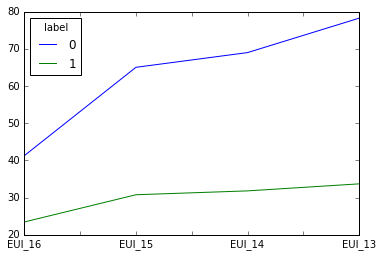

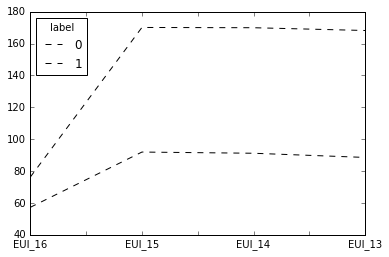

In [123]:

#f.T.plot()
f.T.plot()
s_d.T.plot(style='k--', label='STD')
#plt.plot(f.T,'r')
